In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import sys
sys.path.append('../../Python/')
from Preprocessing import standardize, MaxMinScaler
from Databases import get_databases_path, get_database
from Evaluation import split_gold_standard, train_model, test_model

In [3]:
databases_path = '../../Databases/Sinteticas'
paths = get_databases_path(databases_path)


------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/breast-cancer 

Features: 30

---- Results with Test Set (Ground Thruth) ----

-- Global Precision --
0.9473684210526315


-- General Report --
              precision    recall  f1-score   support

         yes       0.93      0.99      0.96       108
          no       0.98      0.87      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



-- Confusion Matrix --
     0   1
0  107   1
1    8  55

ROC Curve: 

ROC AUC:  0.994268077601411


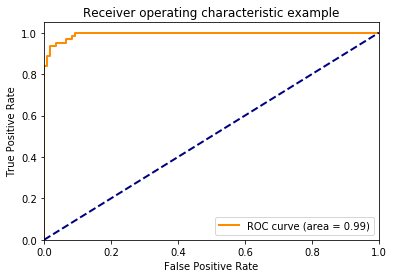


------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/column 

Features: 6

---- Results with Test Set (Ground Thruth) ----

-- Global Precision --
0.7741935483870968


-- General Report --
              precision    recall  f1-score   support

         yes       0.78      0.92      0.85        63
          no       0.74      0.47      0.57        30

    accuracy                           0.77        93
   macro avg       0.76      0.69      0.71        93
weighted avg       0.77      0.77      0.76        93



-- Confusion Matrix --
    0   1
0  58   5
1  16  14

ROC Curve: 

ROC AUC:  0.8317460317460318


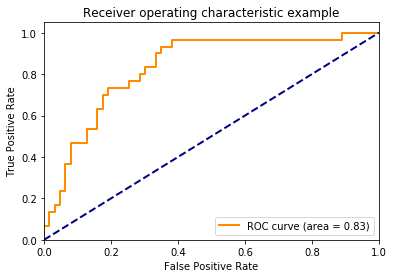


------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/parkinsons 

Features: 22

---- Results with Test Set (Ground Thruth) ----

-- Global Precision --
0.9152542372881356


-- General Report --
              precision    recall  f1-score   support

         yes       0.92      0.98      0.95        46
          no       0.90      0.69      0.78        13

    accuracy                           0.92        59
   macro avg       0.91      0.84      0.86        59
weighted avg       0.91      0.92      0.91        59



-- Confusion Matrix --
    0  1
0  45  1
1   4  9

ROC Curve: 

ROC AUC:  0.9214046822742474


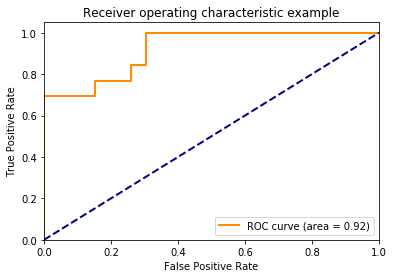


------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/ionophere 

Features: 34

---- Results with Test Set (Ground Thruth) ----

-- Global Precision --
0.9238095238095239


-- General Report --
              precision    recall  f1-score   support

         yes       0.97      0.81      0.88        37
          no       0.91      0.99      0.94        68

    accuracy                           0.92       105
   macro avg       0.94      0.90      0.91       105
weighted avg       0.93      0.92      0.92       105



-- Confusion Matrix --
    0   1
0  30   7
1   1  67

ROC Curve: 

ROC AUC:  0.9491255961844198


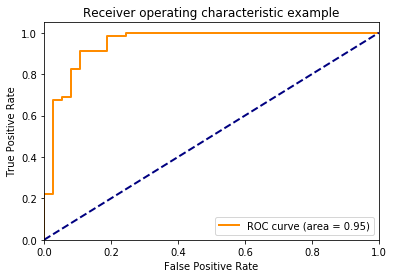


------------------------------------------------------------------------
Database: ../../Databases/Sinteticas/sentiment-polarity 

Features: 50

---- Results with Test Set (Ground Thruth) ----

-- Global Precision --
0.5619047619047619


-- General Report --
              precision    recall  f1-score   support

         yes       0.53      0.42      0.47        48
          no       0.58      0.68      0.63        57

    accuracy                           0.56       105
   macro avg       0.55      0.55      0.55       105
weighted avg       0.56      0.56      0.55       105



-- Confusion Matrix --
    0   1
0  20  28
1  18  39

ROC Curve: 

ROC AUC:  0.6253654970760234


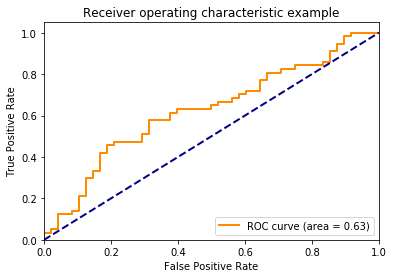

In [4]:
databases_path = '../../Databases/Sinteticas'
paths = get_databases_path(databases_path)

for database in paths:
    print('\n------------------------------------------------------------------------')
    print("Database:", database, '\n')

    # Obtain the attributes and labels
    attr_df = get_database(database, 'database_attr.csv')
    print("Features:", len(attr_df.columns))
    labels_df = get_database(database, 'database_labels.csv')

    # Preprocessing the attributes
    attr_df = MaxMinScaler(attr_df)

    # Get Train, Test data
    X_train, X_test, y_train, y_test = split_gold_standard(attr_df, labels_df)

    # Train model
    model = train_model(X_train, y_train)

    print("\n---- Results with Test Set (Ground Thruth) ----\n")
    # Test model
    test_model(model, X_test, y_test)